In [68]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import datetime as dt
import re

# The dataframe contains all ufo sightings reported by people from the last 20-40 years
## The data was colllected from [the national ufo reporting center](http://www.nuforc.org/webreports/ndxloc.html)
- `data time` is what time they saw it
- `location` is the city/place where they saw it 
- `city/country` describes the country or the state (USA) where it was sighted
- `shape` describes the shape of the ufo
- `duration` how long the encounter lasted
- `summary` a comment about the encounter
- `posted` is an irrelavent column, describes when the log was posted to the website from which the data was collected

In [125]:
dataset = pd.read_csv("ufo.csv")

In [126]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [127]:
dataset.sample(5)

,date Time,location,city/country,shape,duration,summary,posted
70009,1/29/04 12:00,Smiths Falls (Canada),ON,Disk,5 seconds,I looked. facing South-West and this long. alm...,1/31/04
57796,7/14/94 20:00,Branchville,NJ,Circle,5 min,2 horizontal lines - 3 top. 4 under zigzag typ...,11/30/99
75223,2/21/14 20:00,Kennett Square,PA,Diamond,2 minutes,Low flying. no sound. no blinking diamond shap...,2/27/14
37986,10/20/94 23:40,Taunton,MA,Circle,8-10 seconds,I observed the Craft at a close enough distanc...,10/10/11
82460,1/1/20,San Antonio,TX,Oval,5 minutes,looking at fireworks at midnight we observed 1...,2/7/20


In [128]:
dataTimeColumn = "date Time"
locationColumn = "location"
cityColumn = "city/country"
shapeColumn = "shape"
durationColumn = "duration"
summaryColumn = "summary"

In [129]:
#posted column refers to when the row was added to the website this data was collected from
dataset.drop(columns=["posted"], inplace=True)

<AxesSubplot:>

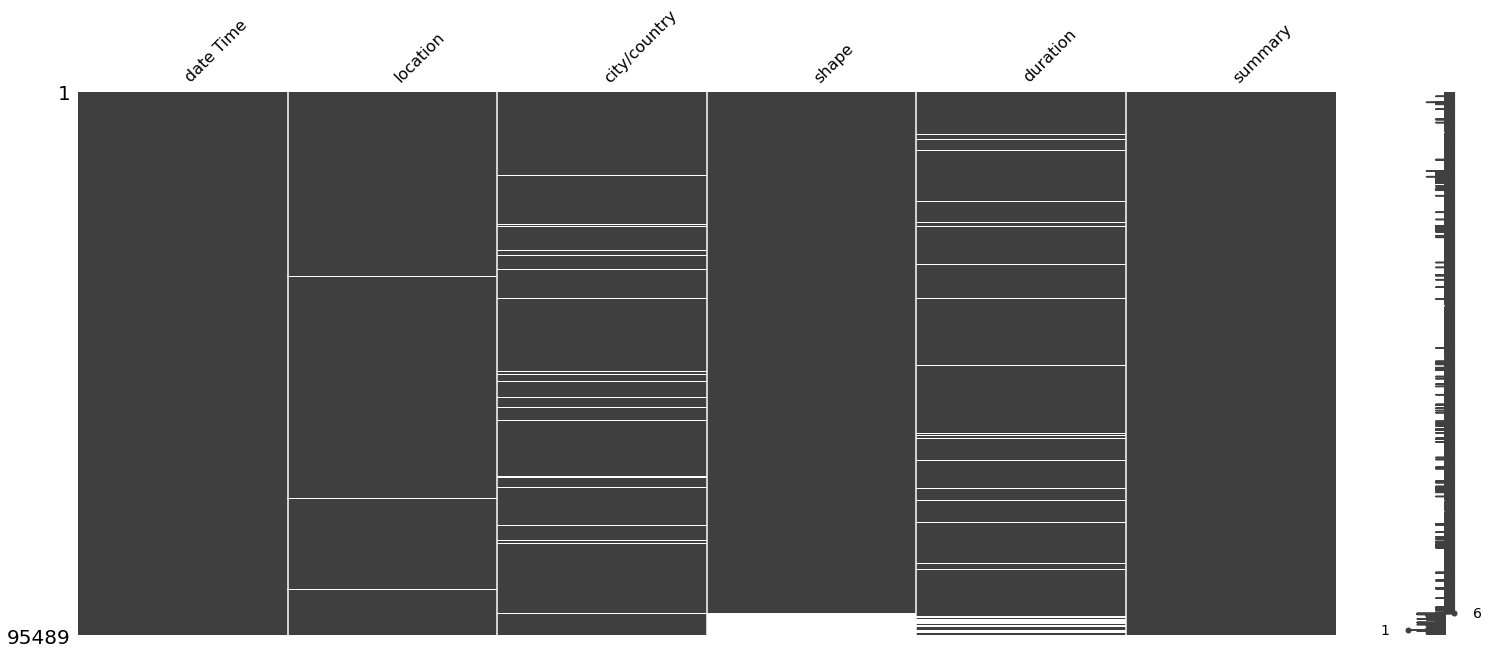

In [130]:
msno.matrix(dataset.sort_values(by = shapeColumn))

<AxesSubplot:>

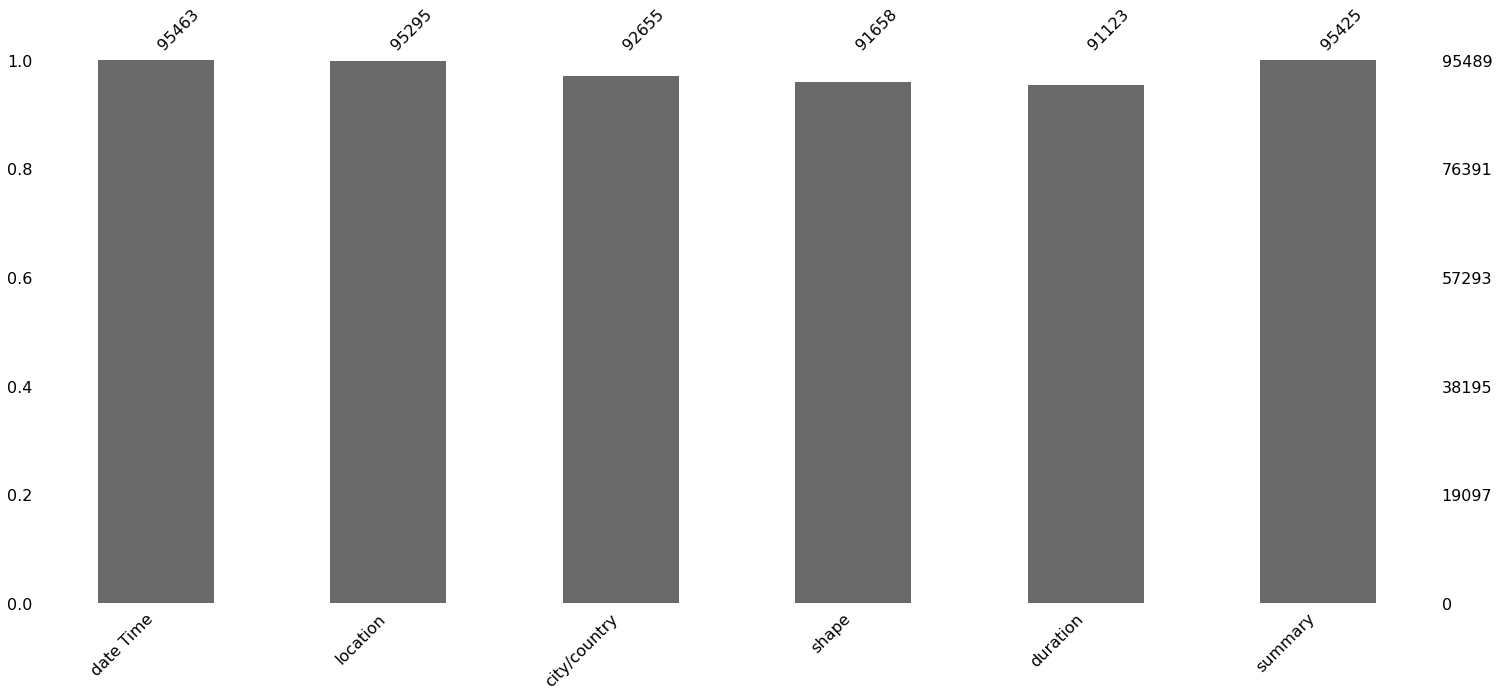

In [131]:
msno.bar(dataset)

In [132]:
dataset[shapeColumn].unique()

array(['Disk', 'Light', 'Oval', 'Unknown', nan, 'Circle', 'Flash',
       'Changing', 'Cigar', 'Formation', 'Sphere', 'Rectangle', 'Other',
       'Triangle', 'Chevron', 'Fireball', 'Egg', 'Teardrop', 'Cylinder',
       'Diamond', 'Cross', 'Cone', 'TRIANGULAR', 'Delta', 'light',
       'changed', 'triangle', 'other', 'rectangle', 'changing', 'unknown',
       'delta', 'cylinder', 'sphere', 'pyramid', 'Crescent', 'cigar',
       'circle', 'fireball'], dtype=object)

In [133]:
len(list(dataset[locationColumn].unique()))

20306

In [134]:
statesList = dataset[cityColumn].unique()

statesList = [i.lower() for i in statesList if str(i) != 'nan']


In [135]:
len(list(dataset[durationColumn].unique()))

8854

In [136]:
dataset.dtypes

date Time       object
location        object
city/country    object
shape           object
duration        object
summary         object
dtype: object

In [137]:
#how many rows that dont contain a number (ie the time is written in letters)
print(len(dataset[durationColumn]) - dataset[durationColumn].str.contains(r'[A-Za-z]').sum())

7230


# Problems
- `shape` column has the most NA values, since its a string object, make them all lower case, remove padding, and replace NA with 'unknown'
- split `date time` column into seperate columns, `year`, `month-day` , `time`,  after changing its data type to datetime
- `duaration` column  has many alphabetic value and cannot be measured in time, change value to numeric, change data time to `int` create new columns called `year`, `month`, `day of month` and `time`
- `location` column has city and  mixed in, split the country value (egypt, canada etc..) to the `city/country` column  

## Problem 1, shape

### Since all the column dtypes are str, we apply two lambda function across all columns
`apply()` takes a function as arg
first time we pass a lambda to lower case all rows, second time to remove white space

In [138]:
dataset = dataset.apply(lambda x: x.astype(str).str.lower())
dataset = dataset.apply(lambda x: x.astype(str).str.strip())

remove NaN from `shape` column , replace them with `unknown`

In [139]:
dataset[shapeColumn].fillna("unknown", inplace=True)

unify data in `shape` column

In [140]:
dataset[shapeColumn] = dataset[shapeColumn].replace({
    'unkown' : 'unknown', 
    'other' : 'unknown',
    'changing' : 'changed',
    'triangular' : 'triangle',
    'nan' : "unknown"
  })

In [141]:
dataset[shapeColumn].unique()

array(['disk', 'light', 'oval', 'unknown', 'circle', 'flash', 'changed',
       'cigar', 'formation', 'sphere', 'rectangle', 'triangle', 'chevron',
       'fireball', 'egg', 'teardrop', 'cylinder', 'diamond', 'cross',
       'cone', 'delta', 'pyramid', 'crescent'], dtype=object)

## Problem 2, datetime


convert data type of `data Time` column to datetime, `errors` argument means, force it if its not the right date format as the other rows

In [142]:
# Convert both columns to datetime
dataset[dataTimeColumn] = pd.to_datetime(dataset[dataTimeColumn],  errors='coerce')

split them into the 4 columns, year,month and day have to be converted to `int` since their default dtype is `float`

In [143]:
dataset["year"] = dataset[dataTimeColumn].dt.year.astype('Int64')

In [144]:
dataset["month"] =  dataset[dataTimeColumn].dt.month.astype('Int64')

In [145]:
dataset["day of month"] =  dataset[dataTimeColumn].dt.day.astype('Int64')

In [146]:
dataset["time"] =  dataset[dataTimeColumn].dt.time

convert the `month` column to its alphabetic equivalent, makes it easier to read

In [147]:
#map from numeric months to string for better presentation
monthsMapping = {
    1 : "january",
    2 : "february",
    3 : "march",
    4 : "april",
    5 : "may",
    6 : "june",
    7 : "july",
    8 : "august",
    9 : "september",
    10 : "october",
    11 : "november",
    12 : "december"
   }
dataset["month"] = dataset["month"].map(monthsMapping)

the `date time` column is no longer needed

In [148]:
dataset.drop(columns= [dataTimeColumn], inplace=True)

In [149]:
dataset.sample(5)

,location,city/country,shape,duration,summary,year,month,day of month,time
17725,northford,ct,egg,23 seconds,a glow in the sky......,2002,october,2,06:34:00
78975,aiken,sc,sphere,10 seconds,black circle in sky over a lake,2008,august,1,00:00:00
9568,kelowna (canada),bc,sphere,nan,sometime after 9:00 this evening my husband ca...,2013,august,8,21:30:00
88379,richmond,va,disk,30 seconds,aircraft-size disk hovering in sky soundlessly...,1999,february,19,19:30:00
46407,kansas city,mo,light,20 minutes,multi-colored object in kc. mo sky. ((nuforc n...,2017,october,19,02:57:00


In the `duration` column, there are two types of data :
1. The first type of data where the duration is written in numbers and the time unit in alphabetic ie `5 mins`
2. The second type where both the duration and the time unit are written in alphabetic ie `five minutes`
we can use regex to extract the number and the duration into two dataframes

## Here is how the output should look like 

| time duration | time unit |
| ------  | ----------- |
| 5       | minutes     | 
| 40      | mins        |
| NAN     | about one minute            |

In [150]:
numStr =  dataset[durationColumn].str.replace(r'(\d)', '', regex=True)
num  = dataset[durationColumn].str.extract(r'(\d+)')

In [151]:
print(len(numStr), len(num))

95489 95489


### since `numStr` and `num` are the same length, we can split them into two seperate columns

In [152]:
dataset["time duration"] = num[0].str.strip()
dataset["time unit"] = numStr

convert the `time duration` column to `int` from  `str`

In [153]:
dataset["time duration"] = dataset["time duration"].astype('float').astype('Int64')

the `duration` column is no longer needed, drop it

In [154]:
dataset.drop(columns=[durationColumn],inplace=True)

In [155]:
dataset.sample(5)

,location,city/country,shape,summary,year,month,day of month,time,time duration,time unit
42007,bay city,mi,light,orange balls of light float across sky droppin...,2015,march,24,10:30:00,5,minutes
32671,phillipsburg,ks,sphere,my wife. myself and some friends were coming i...,2011,july,4,22:30:00,3,minutes
85101,riverdale,ut,disk,5 metallic unidentified flying objs slowly fly...,2017,august,3,09:00:00,1,minute
4186,huntsville,al,light,two moving yellowish lights over huntsville. a...,2019,july,8,22:24:00,30,seconds
85062,salt lake city,ut,unknown,madar,2018,february,22,15:05:00,<NA>,nan


<AxesSubplot:>

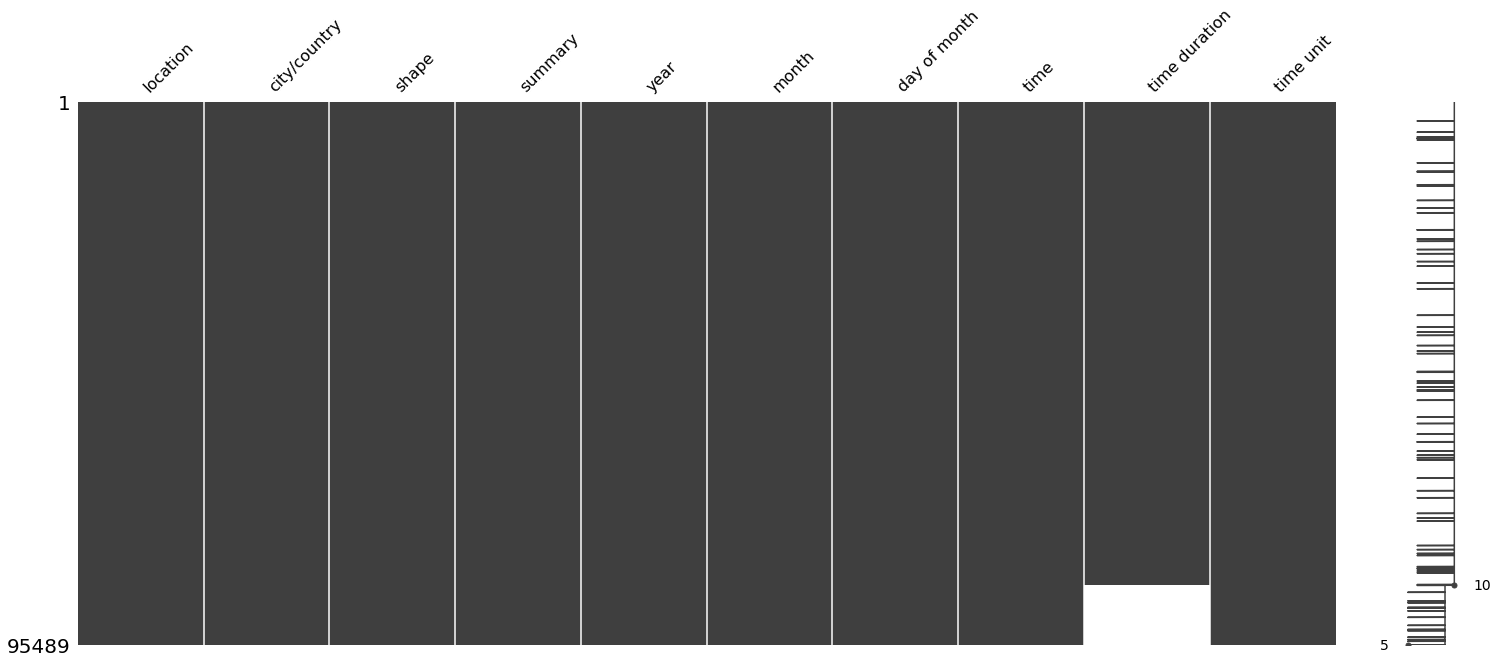

In [156]:
msno.matrix(dataset.sort_values(by = "time duration"))

The `time unit` column has special characters in it example `about 10+ minutes` or
`it lasted ~10 minutes`, we use regex to replace anything that that is not  from a-z either lower case or capital with a whitespace

In [157]:
dataset["time unit"] =  dataset["time unit"].str.replace('[^a-zA-Z]', ' ', regex=True)

Since we split the two columns by alpha-numeric values, we are left with ~`10k` NaN rows in the `time duration` column, we replace them with mean of the column 

In [158]:
dataset["time duration"].isna().sum()

10527

In [159]:
durationMean =  int(dataset["time duration"].mean())
dataset["time duration"].fillna(durationMean, inplace=True)

In the `time unit` column, our units are not uniform, meaning that we might have multiple different time formats in different languages
Since most languages in the dataframe are based on latin, they have similar spellings
here is what we might expect in the dataframe

| time unit |
|----------|
| minute|
|mins|
|minuta|
|minuto|
|hrs |
|hours|
|hr|
|year|
|yr|

to capture all these values, we use regex `\\b{word}[a-zA-Z]*` which means, capture all words that begin with the targeted value,  only if its alphabetic and select it from the first  till the last character. we have to use `*` or else regex will only select the targeted value and ignore the rest of the word

In [160]:
mapping  = [
    "min",
    "hr", 
    "hour",
    "day",
    "dy", 
    "month", 
    "week",
    "mth",
    "yr",
    "year",
    "wk",
    "fast", 
    "moment", 
    "quick", 
    "long",
    "instant"
    ]

mapping = ["\\b{}[a-zA-Z]*".format(i) for i in mapping]

regexPattern =  r'({})'.format('|'.join(mapping))


In [161]:
mapping

['\\bmin[a-zA-Z]*',
 '\\bhr[a-zA-Z]*',
 '\\bhour[a-zA-Z]*',
 '\\bday[a-zA-Z]*',
 '\\bdy[a-zA-Z]*',
 '\\bmonth[a-zA-Z]*',
 '\\bweek[a-zA-Z]*',
 '\\bmth[a-zA-Z]*',
 '\\byr[a-zA-Z]*',
 '\\byear[a-zA-Z]*',
 '\\bwk[a-zA-Z]*',
 '\\bfast[a-zA-Z]*',
 '\\bmoment[a-zA-Z]*',
 '\\bquick[a-zA-Z]*',
 '\\blong[a-zA-Z]*',
 '\\binstant[a-zA-Z]*']

After extracting all targeted time units, we replace them with the proper value

In [162]:
regexMapping = {
  '\\bmin[a-zA-Z]*' : "minute",
 '\\bhr[a-zA-Z]*' : "hour",
 '\\bhour[a-zA-Z]*' : "hour",
 '\\bday[a-zA-Z]*': "day",
 '\\bmonth[a-zA-Z]* ' : "month",
 '\\bweek[a-zA-Z]*' : "week",
 '\\bmth[a-zA-Z]*' : "month",
 '\\byr[a-zA-Z]*' : "year",
 '\\byear[a-zA-Z]*' : "year",
 '\\bwk[a-zA-Z]*' : "week",
 '\\bfast[a-zA-Z]*' : "second",
 '\\bmoment[a-zA-Z]*' : "second",
 '\\bquick[a-zA-Z]*' : "second",
 '\\blong[a-zA-Z]*' : "second",
 '\\binstant[a-zA-Z]*' : "second",
 "months" : "month"
}

In [163]:
timeUnit =  dataset["time unit"].str.extract(regexPattern,re.IGNORECASE)

In [164]:
for k, v in  regexMapping.items():
    timeUnit[0] = timeUnit[0].replace(to_replace = k, value = v, regex=True)

replace NaN values with the most occuring time unit, which in this dataframe it is `minute`

In [165]:
dataset["time unit"] = timeUnit[0].fillna(timeUnit[0].mode()[0])

we have many rows in the `year` column that are in the future, replace them with current year

In [166]:
today = dt.date.today()

In [167]:
len(dataset[dataset["year"] > today.year])

1173

In [168]:
yearIndex =  dataset[dataset["year"] > today.year].index
dataset.loc[yearIndex, "year"] = today.year

we cannot have 0 duration in the `time duration` column, replace them with 1

In [169]:
dataset["time duration"] = dataset["time duration"].replace(0, 1)

replace the rows where both `location` and `city/country` country are NaN with unknown

In [170]:
indices =  dataset.loc[ (dataset[locationColumn].isna()) & (dataset[cityColumn].isna() )].index
dataset.loc[indices, [locationColumn, cityColumn]] = "unknown"

In the `city/country` column NaN means that its a country other than the USA and a non NAN represents a state code ex `NY`, `QC`... which either means its a state in the USA or a canadian province.
In the case of USA, the `location` column just lists the city
In the case of Canada or the  rest of the world, the `location` column has the format of `city (country)` and sometimes extra info `city (highway) (country)`
to extract the country we use the regex pattern `canada|india|lebanon...` which means extract any word in the column if its present in the regex pattern.
we obtain this list from `country.csv`

In [171]:
countries = pd.read_csv('country.csv')
countries["name"] = countries["name"].str.lower()
countries["name"] = countries["name"].str.strip()

In [172]:
countriesRegex  = r"({})".format( "|".join(countries["name"].tolist()))

In [173]:
countries = dataset[locationColumn].str.extract(countriesRegex,re.IGNORECASE)

extract all countries, shift them all to the `city/country` column.

the regex pattern `\(([^)]*)\)` means select all occurence of `(` and `)` and all value between them, then we replace them with empty string. we are left with the city/town in the `location` column

In [174]:
bracketRegex =  r"\(([^)]*)\)"

indices = countries.loc[ ~countries[0].isna() ].index

dataset.loc[indices, cityColumn] = countries.loc[indices, 0].values

dataset[locationColumn]  = dataset[locationColumn].str.replace(bracketRegex, "" , regex=True)

In [175]:
len(statesList)

71

replace all values in `city/country` column that is a US state, replace them with `united states`

In [176]:
stateIndices = dataset.loc[ (dataset[cityColumn].isin(statesList))].index

In [177]:
dataset.loc[stateIndices, cityColumn] = "united states"

In [178]:
indices = dataset.loc[ (dataset[cityColumn] == "nan")].index 
dataset.loc[indices,cityColumn] = "unknown"

In [179]:
indices = dataset.loc[ (dataset[locationColumn] == "nan")].index 
dataset.loc[indices,locationColumn] = "unknown"

In [180]:
dataset.loc[ (dataset[shapeColumn] == "nan")].index 

Int64Index([], dtype='int64')

In [181]:
dataset.rename(columns={cityColumn : "country"}, inplace=True)

In [186]:
dataset.to_csv('cleaned_ufo.csv', na_rep="unknown")